In [183]:
#Course : CS 513 - Knowledge discovery and Data mining
#Course Instructor:- Khashayar Dehnad
#First Name: Keval
#Last Name: Sompura
#Id: 20033127
#Final Exam: 01 - C5.0
#Description: Implementation of C5.0 algorithm

In [184]:
#import necessary library and read the csv file
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [185]:
folder='C:/Users/Asus/OneDrive/Stevens/Sem-2/KDDM/End Term/'
file='hepatitis_A.csv'
df = pd.read_csv(folder+file)

In [186]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,Age_Quartile
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,1,Q1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,1,Q3
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,1,Q4
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,1,Q1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,1,Q2


In [187]:
df.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
count,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,155.000000
mean,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,1.451613
std,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,2.000000


In [188]:
#looking for null values
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITES             5
 VARICES            5
BILIRUBIN           6
ALK_PHOSPHATE      29
SGOT                4
ALBUMIN            16
HISTOLOGY           0
Age_Quartile        0
dtype: int64

In [189]:
#dropping null values
df.dropna(inplace=True)
df.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
 VARICES           0
BILIRUBIN          0
ALK_PHOSPHATE      0
SGOT               0
ALBUMIN            0
HISTOLOGY          0
Age_Quartile       0
dtype: int64

In [190]:
#looking for null values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
 VARICES           0
BILIRUBIN          0
ALK_PHOSPHATE      0
SGOT               0
ALBUMIN            0
HISTOLOGY          0
Age_Quartile       0
dtype: int64


In [191]:
# Select features and target
features = ["SEX", "Age_Quartile", "STEROID", "FATIGUE", "MALAISE"]
X = df[features]
y = df["Class"]

In [192]:
#Label encoding age quartile
le = LabelEncoder()
X["Age_Quartile"] = le.fit_transform(X["Age_Quartile"])


C:\Users\Asus\AppData\Local\Temp\ipykernel_60484\1781574263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age_Quartile"] = le.fit_transform(X["Age_Quartile"])


In [193]:
X.head()

,SEX,Age_Quartile,STEROID,FATIGUE,MALAISE
0,2,0,1.0,2.0,2.0
1,1,2,1.0,1.0,2.0
2,1,3,2.0,1.0,2.0
5,1,1,2.0,2.0,2.0
10,1,1,1.0,2.0,2.0


In [194]:
# Split into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [195]:
# Train a Decision Tree model (C5.0 equivalent)
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [196]:
# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=False)
print("Accuracy: ", accuracy)

Accuracy:  0.7647058823529411


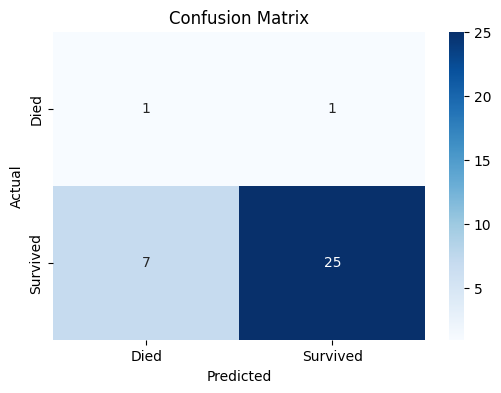

Confusion Matrix:
 [[ 1  1]
 [ 7 25]]


In [197]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Died", "Survived"],
            yticklabels=["Died", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Optionally print it as an array
print("Confusion Matrix:\n", cm)

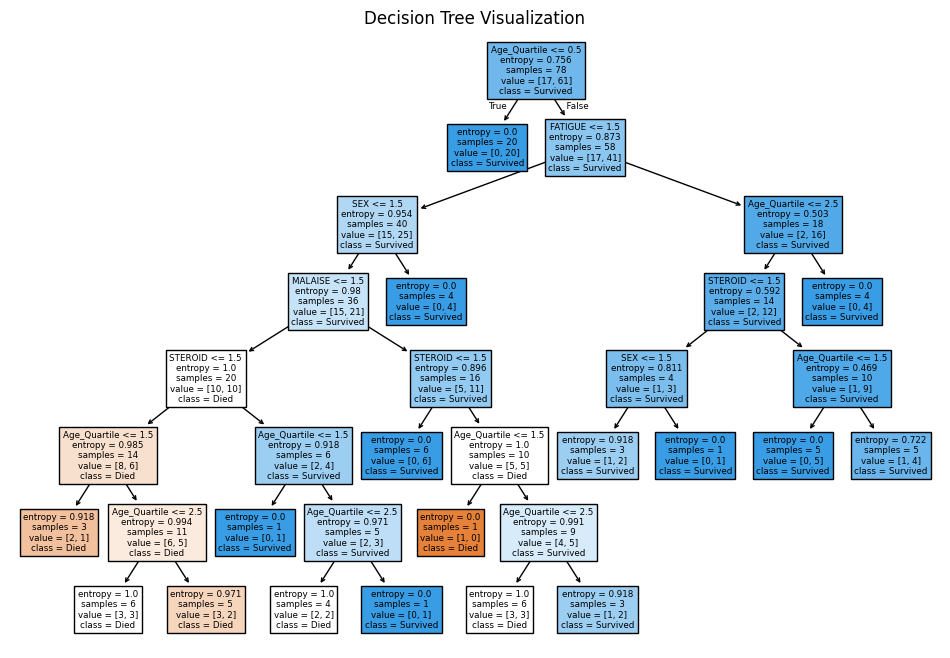

In [198]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [199]:
print(report)

              precision    recall  f1-score   support

           1       0.12      0.50      0.20         2
           2       0.96      0.78      0.86        32

    accuracy                           0.76        34
   macro avg       0.54      0.64      0.53        34
weighted avg       0.91      0.76      0.82        34



While the overall accuracy of 76.47% seems reasonable, the model's performance is highly imbalanced between the two classes. For class 1, the precision is only 0.12 and the recall is 0.50, indicating that the model rarely predicts class 1 and, when it does, it is often incorrect. In contrast, for class 2, both precision (0.96) and recall (0.78) are much higher. This suggests the model is biased towards predicting class 2, likely due to class imbalance in the dataset. Therefore, despite the decent accuracy, this is not a good model for detecting class 1 cases.
